In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
train_data = pd.read_csv('titanic_train.csv',index_col='PassengerId')
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
numeric_features = ['Age','Fare']
ordinal_features = ['Pclass','SibSp','Parch']
nominal_features = ['Sex','Embarked']

In [6]:
train_data['target_name'] = train_data['Survived'].map({0:'Not Survived',1:'Survived'})

In [7]:
train_data['target_name']

PassengerId
1      Not Survived
2          Survived
3          Survived
4          Survived
5      Not Survived
6      Not Survived
7      Not Survived
8      Not Survived
9          Survived
10         Survived
11         Survived
12         Survived
13     Not Survived
14     Not Survived
15     Not Survived
16         Survived
17     Not Survived
18         Survived
19     Not Survived
20         Survived
21     Not Survived
22         Survived
23         Survived
24         Survived
25     Not Survived
26         Survived
27     Not Survived
28     Not Survived
29         Survived
30     Not Survived
           ...     
862    Not Survived
863        Survived
864    Not Survived
865    Not Survived
866        Survived
867        Survived
868    Not Survived
869    Not Survived
870        Survived
871    Not Survived
872        Survived
873    Not Survived
874    Not Survived
875        Survived
876        Survived
877    Not Survived
878    Not Survived
879    Not Survived
880     

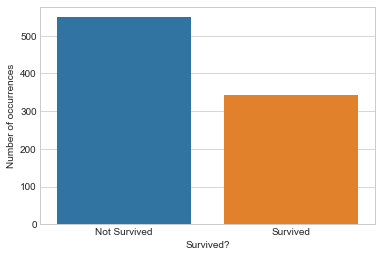

In [9]:
sns.countplot(train_data.target_name)
plt.xlabel('Survived?')
plt.ylabel('Number of occurrences')
plt.show()

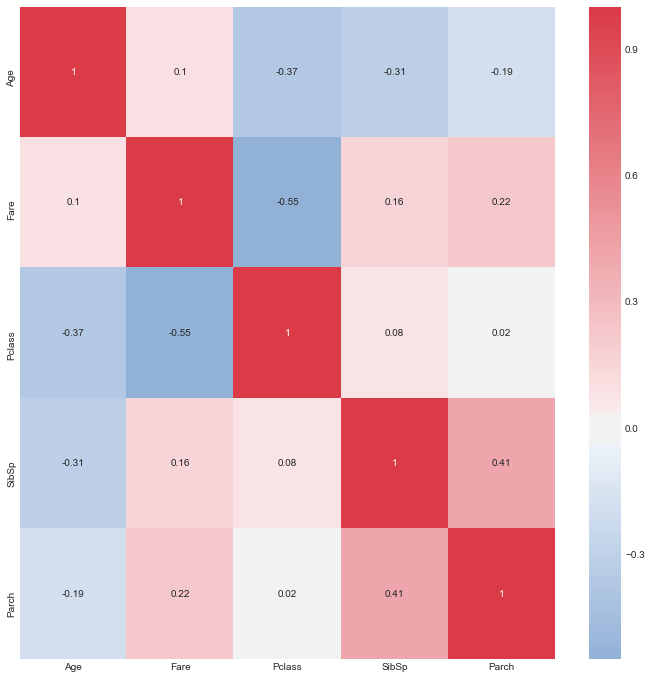

In [10]:
cor_matrix = train_data[numeric_features+ordinal_features].corr().round(2)
fig = plt.figure(figsize=(12,12))
sns.heatmap(cor_matrix,annot=True,center=0,cmap=sns.diverging_palette(250,10,as_cmap=True),ax=plt.subplot(111))
plt.show()

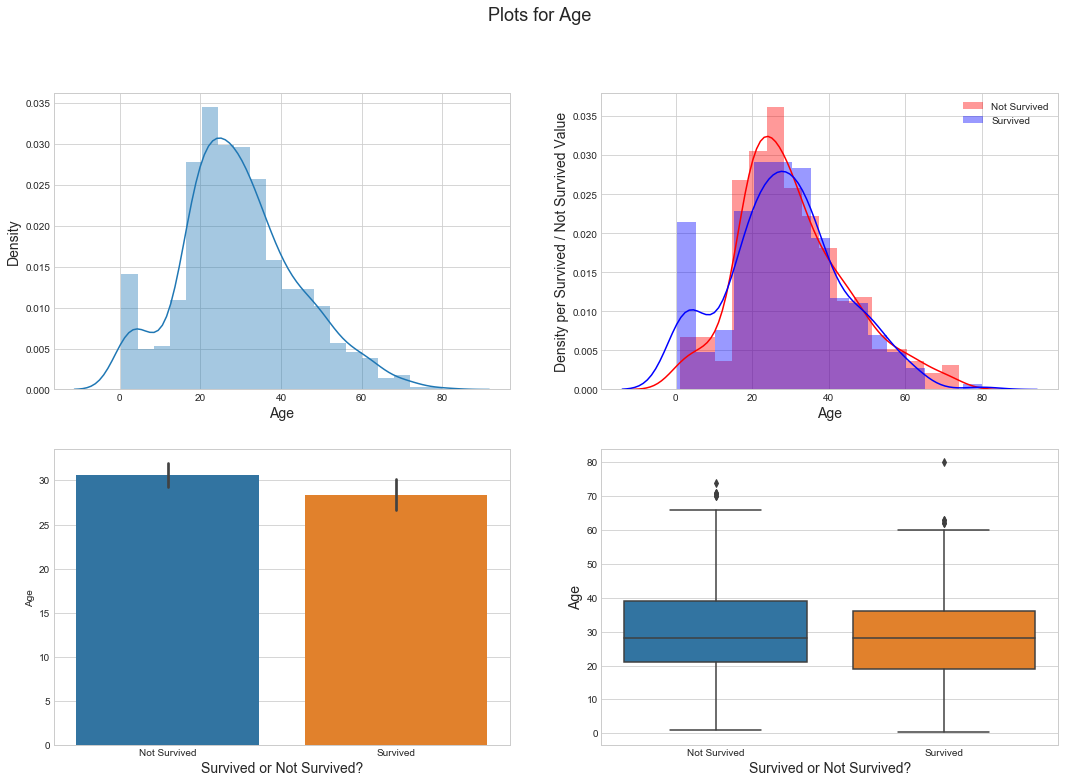

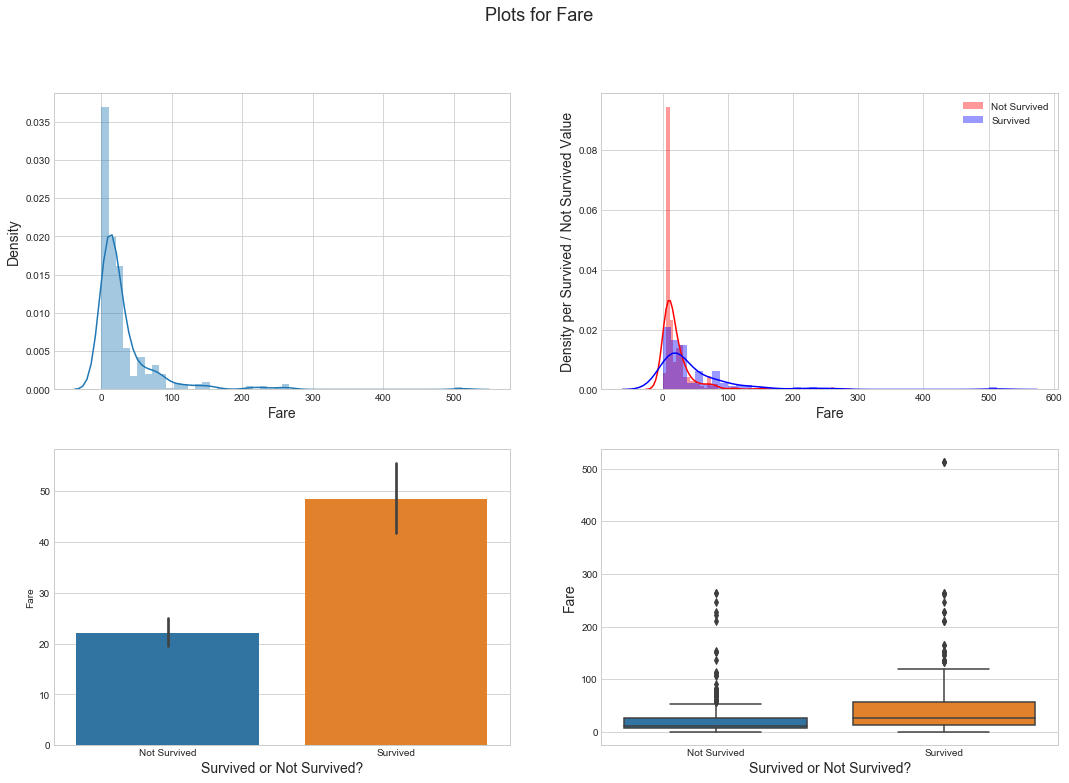

In [11]:
for column in numeric_features:
    fig = plt.figure(figsize=(18,12))
    sns.distplot(train_data[column].dropna(),ax=plt.subplot(221))
    plt.xlabel(column,fontsize=14)
    plt.ylabel('Density',fontsize=14)
    plt.suptitle('Plots for '+column,fontsize=18)
    sns.distplot(train_data.loc[train_data.Survived==0,column].dropna(),color='red',label='Not Survived',ax=plt.subplot(222))
    sns.distplot(train_data.loc[train_data.Survived==1,column].dropna(),color='blue',label='Survived',ax=plt.subplot(222))
    plt.legend(loc='best')
    plt.xlabel(column,fontsize=14)
    plt.ylabel('Density per Survived / Not Survived Value',fontsize=14)
    sns.barplot(x="target_name",y=column,data=train_data,ax=plt.subplot(223))
    plt.xlabel('Survived or Not Survived?',fontsize=14)
    sns.boxplot(x="target_name",y=column,data=train_data,ax=plt.subplot(224))
    plt.xlabel('Survived or Not Survived?',fontsize=14)
    plt.ylabel(column,fontsize=14)
    plt.show()

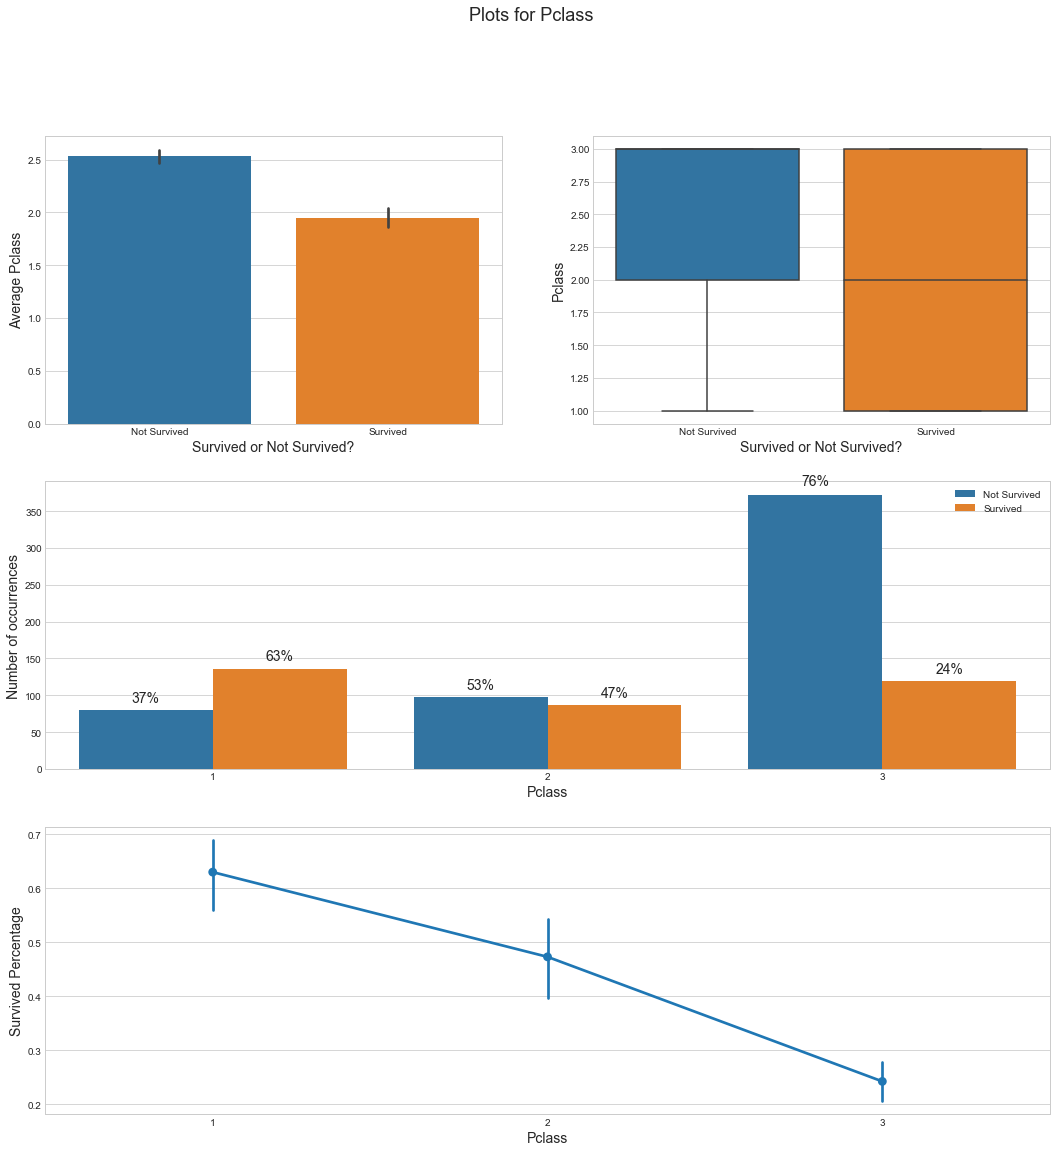

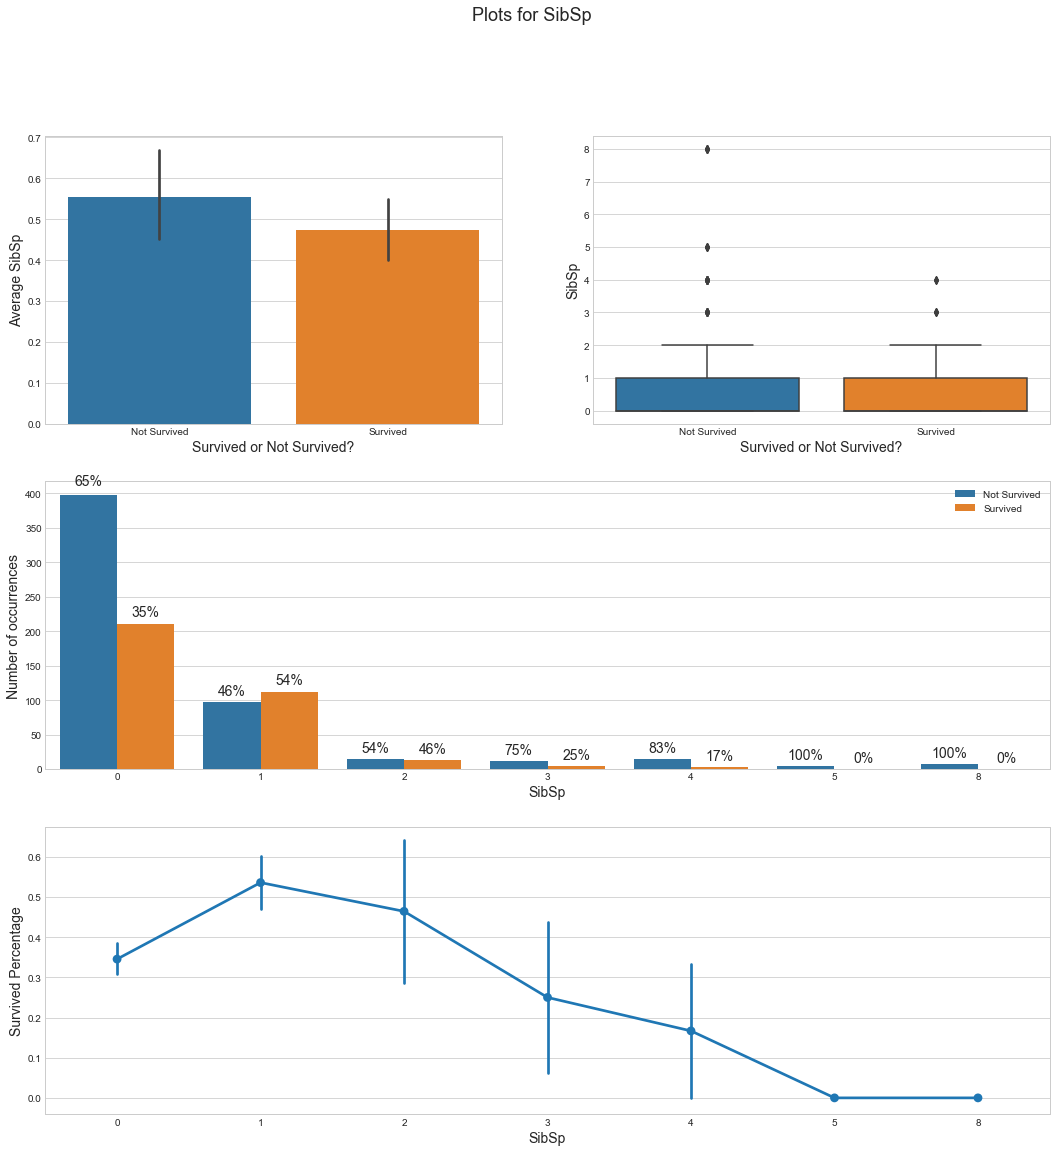

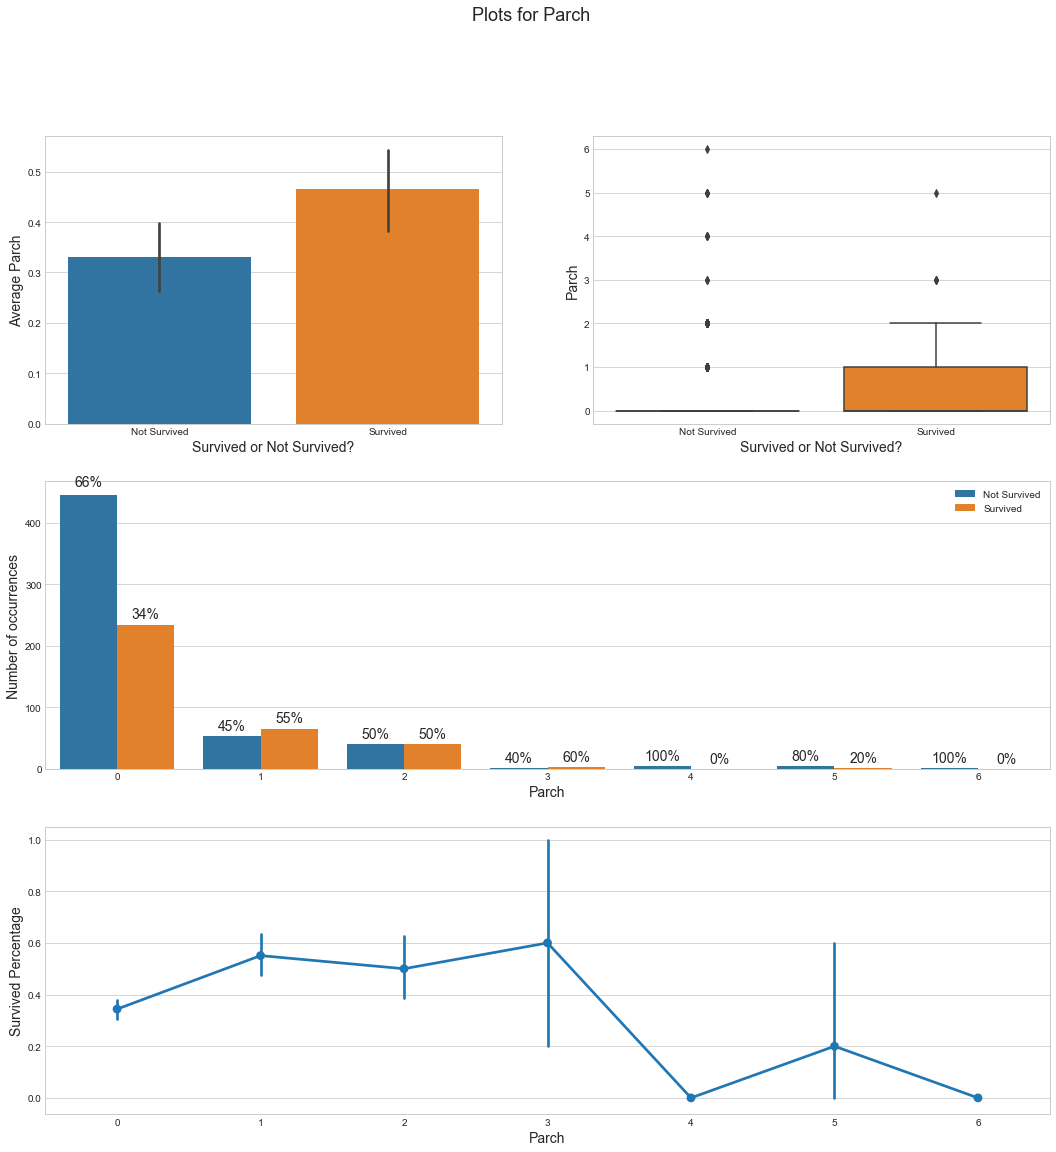

In [12]:
for column in ordinal_features:
    fig = plt.figure(figsize=(18,18))
    
    sns.barplot(x="target_name",y=column,data=train_data,ax=plt.subplot(321))
    plt.xlabel('Survived or Not Survived?',fontsize=14)
    plt.ylabel('Average '+column,fontsize=14)
    plt.suptitle('Plots for '+column,fontsize=18)
    
    sns.boxplot(x="target_name",y=column,data=train_data,ax=plt.subplot(322))
    plt.xlabel('Survived or Not Survived?',fontsize=14)
    plt.ylabel(column,fontsize=14)
    
    ax = sns.countplot(x=column,hue="target_name",data=train_data,ax=plt.subplot(312))
    plt.xlabel(column,fontsize=14)
    plt.ylabel('Number of occurrences',fontsize=14)
    plt.legend(loc=1)
    height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
    ncol = int(len(height)/2)
    total = [height[i]+height[i+ncol] for i in range(ncol)]*2
    for i,p in enumerate(ax.patches):
        ax.text(p.get_x()+p.get_width()/2,height[i]*1.01+10,'{:1.0%}'.format(height[i]/total[i]),ha="center",size=14)
        
    sns.pointplot(x=column,y='Survived',data=train_data,ax=plt.subplot(313))
    plt.xlabel(column,fontsize=14)
    plt.ylabel('Survived Percentage',fontsize=14)
    plt.show()

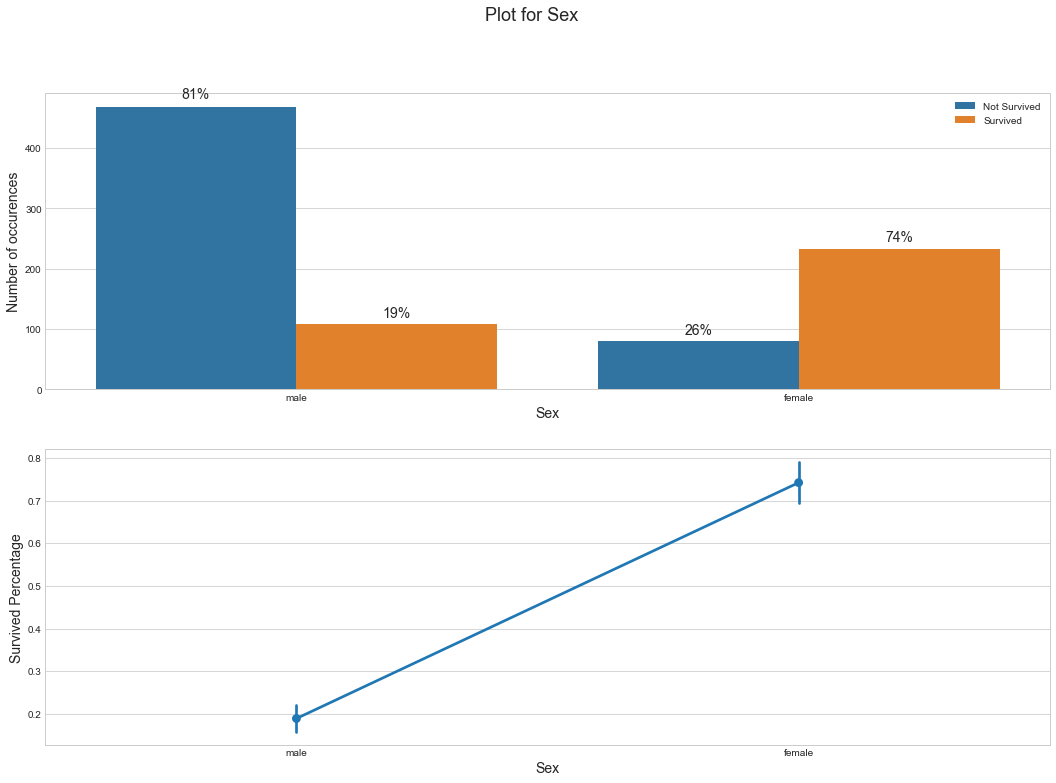

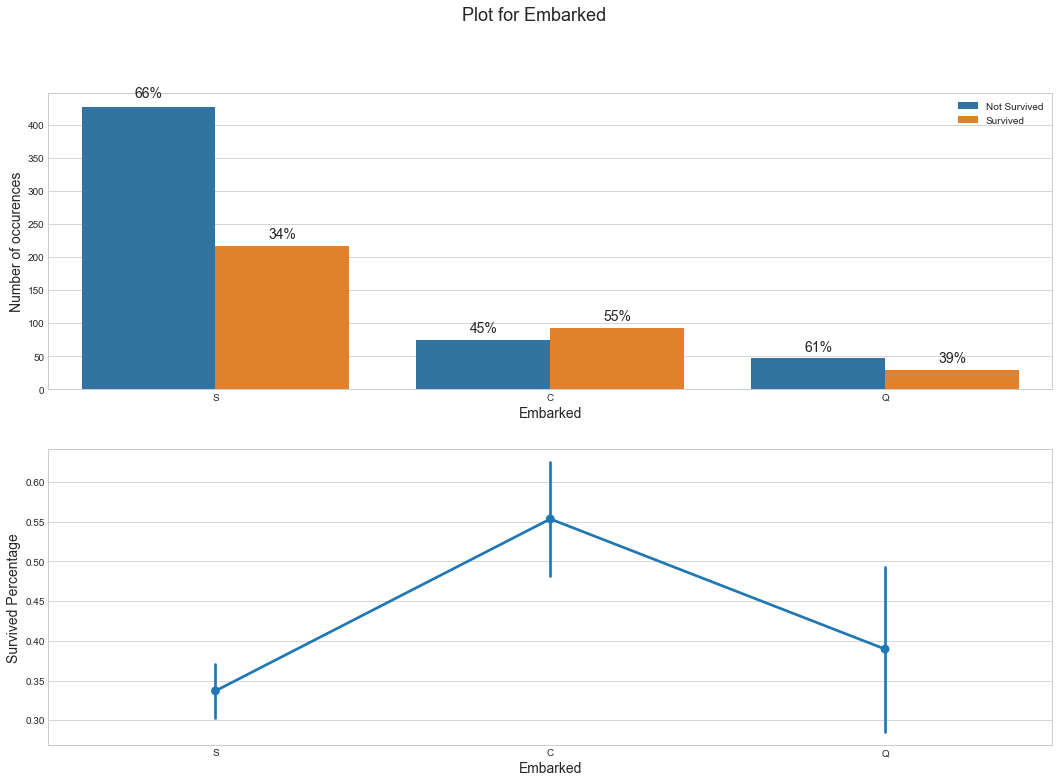

In [15]:
for column in nominal_features:
    fig = plt.figure(figsize=(18,12))
    
    ax = sns.countplot(x=column,hue="target_name",data=train_data,ax=plt.subplot(211))
    plt.xlabel(column,fontsize=14)
    plt.ylabel('Number of occurences',fontsize=14)
    plt.suptitle('Plot for '+column,fontsize=18)
    plt.legend(loc=1)    
    height = [p.get_height() for p in ax.patches]
    ncol = int(len(height)/2)
    total = [height[i]+height[i+ncol] for i in range(ncol)]*2
    for i,p in enumerate(ax.patches):
        ax.text(p.get_x()+p.get_width()/2,height[i]*1.01+10,'{:1.0%}'.format(height[i]/total[i]),ha="center",size=14)
    
    sns.pointplot(x=column,y='Survived',data=train_data,ax=plt.subplot(212))
    plt.xlabel(column,fontsize=14)
    plt.ylabel('Survived Percentage',fontsize=14)
    plt.show()